In [87]:
import pandas as pd

df = pd.read_excel (r'C:\Users\kkanoee\Documents\Python Scripts\TablePython.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
print (df)
df.iat[0,1]

for ind in df.index:
    print(df['CollectionList'][ind], df['TokenList'][ind], df['Tokenperday'][ind])
    print('next')
    
    apicall='https://api-mainnet.magiceden.dev/v2/collections/'+df['CollectionList'][ind]+'/stats/'
    print(apicall)
    

    CollectionList TokenList  Tokenperday
0          turtles     TRTLS         5.00
1           degods      DUST         7.50
2  boryoku_dragonz      BOKU         7.00
3   taiyo_robotics     SCRAP         8.50
4  blocksmith_labs    $FORGE        10.00
turtles TRTLS 5.0
next
https://api-mainnet.magiceden.dev/v2/collections/turtles/stats/
degods DUST 7.5
next
https://api-mainnet.magiceden.dev/v2/collections/degods/stats/
boryoku_dragonz BOKU 7.0
next
https://api-mainnet.magiceden.dev/v2/collections/boryoku_dragonz/stats/
taiyo_robotics SCRAP 8.5
next
https://api-mainnet.magiceden.dev/v2/collections/taiyo_robotics/stats/
blocksmith_labs $FORGE 10.0
next
https://api-mainnet.magiceden.dev/v2/collections/blocksmith_labs/stats/


In [88]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


column_names = ["symbol", "floorPrice", "listedCount", "avgPrice24hr", "volumeAll"]
dfAfp = pd.DataFrame(columns = column_names)

column_token = ['timestamp', 'error_code', 'error_message','elapsed', 'credit_count', 'notice','id', 'name', 'symbol','slug', 'num_market_pairs', 'date_added','tags', 'max_supply', 'circulating_supply','total_supply', 'id', 'name','symbol', 'platform_slug', 'platform_token_address','is_active', 'cmc_rank', 'is_fiat','self_reported_circulating_supply', 'self_reported_market_cap', 'tbl_ratio','last_updated', 'usd_price', 'usd_volume_24h','usd_volume_change_24h', 'usd_percent_change_1h', 'usd_percent_change_24h','usd_percent_change_7d', 'usd_percent_change_30d', 'usd_percent_change_60d','usd_percent_change_90d', 'usd_marketcap', 'usd_marketcap_dominance','usd_full_diluted_marketcap', 'usd_tvl', 'usd_last_updated', 'token_per_day', 'usd_per_day']
dfA = pd.DataFrame(columns = column_token)
dfA = dfA.reset_index(drop=True)

for ind in df.index:
    print(df['CollectionList'][ind], df['TokenList'][ind], df['Tokenperday'][ind])
    print('next')

    #Collection -------------------------------------------------------------
    
    apicall='https://api-mainnet.magiceden.dev/v2/collections/'+df['CollectionList'][ind]+'/stats/'
    
    url = apicall
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0fbe4952-0675-4f13-8274-fb02dbd99dbf',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url)
      FloorPrice = json.loads(response.text)
      #print(FloorPrice)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df1fp = pd.json_normalize(FloorPrice)
    dfAfp = pd.concat([dfAfp, df1fp], ignore_index=True, sort=False)
    
    #Tokens -----------------------------------------------------------------
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
    parameters = {
      'convert':'USD',
    'symbol':df['TokenList'][ind]
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0fbe4952-0675-4f13-8274-fb02dbd99dbf',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      Token = json.loads(response.text)
      #print(Token)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df1 = pd.json_normalize(Token)
    df1.columns = ['timestamp', 'error_code', 'error_message','elapsed', 'credit_count', 'notice','id', 'name', 'symbol','slug', 'num_market_pairs', 'date_added','tags', 'max_supply', 'circulating_supply','total_supply', 'id', 'name','symbol', 'platform_slug', 'platform_token_address','is_active', 'cmc_rank', 'is_fiat','self_reported_circulating_supply', 'self_reported_market_cap', 'tbl_ratio','last_updated', 'usd_price', 'usd_volume_24h','usd_volume_change_24h', 'usd_percent_change_1h', 'usd_percent_change_24h','usd_percent_change_7d', 'usd_percent_change_30d', 'usd_percent_change_60d','usd_percent_change_90d', 'usd_marketcap', 'usd_marketcap_dominance','usd_full_diluted_marketcap', 'usd_tvl', 'usd_last_updated']
    df1.loc[0,'token_per_day']=df['Tokenperday'][ind]
    df1['usd_per_day']=df1['usd_price']*df1['token_per_day']
    
    df1.reset_index(inplace=True, drop=True)
    dfA.reset_index(inplace=True, drop=True)
    dfA = pd.concat([dfA, df1], ignore_index=True, sort=False)


turtles TRTLS 5.0
next
degods DUST 7.5
next
boryoku_dragonz BOKU 7.0
next
taiyo_robotics SCRAP 8.5
next
blocksmith_labs $FORGE 10.0
next


In [89]:
dfA

,timestamp,error_code,error_message,elapsed,credit_count,notice,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,id,name,symbol,platform_slug,platform_token_address,is_active,cmc_rank,is_fiat,self_reported_circulating_supply,self_reported_market_cap,tbl_ratio,last_updated,usd_price,usd_volume_24h,usd_volume_change_24h,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_marketcap,usd_marketcap_dominance,usd_full_diluted_marketcap,usd_tvl,usd_last_updated,token_per_day,usd_per_day
0,2022-10-13T13:20:49.191Z,0,None,1972,1,None,15330,Turtles Token,TRTLS,turtles-token,3,2021-11-30T03:49:23.000Z,"[collectibles-nfts, gaming, solana-ecosystem]",30000000,0,30000000,5426,Solana,SOL,solana,q4bpaRKw3fJB1AJBeeBaKv3TjYzWsmntLgnSB275YUb,1,5609,0,None,None,None,2022-10-13T13:19:00.000Z,0.08,2527.84,-57.76,-2.08,-10.21,-20.63,-13.54,-36.68,-17.65,0,0,2462625.92,None,2022-10-13T13:19:00.000Z,5.00,0.41
1,2022-10-13T13:20:49.808Z,0,None,36,1,None,18802,DUST Protocol,DUST,dust-protocol,12,2022-03-14T13:00:32.000Z,[solana-ecosystem],None,0,0,5426,Solana,SOL,solana,DUSTawucrTsGU8hcqRdHDCbuYhCPADMLM2VcCb8VnFnQ,1,2661,0,None,None,None,2022-10-13T13:19:00.000Z,1.05,16333836.08,941.26,-2.35,-11.44,-33.23,-21.68,-41.11,0.56,0,0,0,None,2022-10-13T13:19:00.000Z,7.50,7.88
2,2022-10-13T13:20:50.154Z,0,None,44,1,None,15097,Boryoku Dragonz,BOKU,boku,1,2021-11-24T04:34:29.000Z,[],42069069,0,42069069,5426,Solana,SOL,solana,CN7qFa5iYkHz99PTctvT4xXUHnxwjQ5MHxCuTJtPN5uS,1,6671,0,None,None,None,2022-10-13T13:19:00.000Z,0.08,219.18,0.73,-0.08,-2.06,-7.28,-43.63,-32.98,-56.26,0,0,3554147.42,None,2022-10-13T13:19:00.000Z,7.00,0.59
3,2022-10-13T13:20:50.494Z,0,None,41,1,None,17656,Scrap,SCRAP,scrap,4,2022-01-26T09:21:40.000Z,[solana-ecosystem],None,0,5000000,5426,Solana,SOL,solana,6naWDMGNWwqffJnnXFLBCLaYu1y5U9Rohe5wwJPHvf1p,1,3095,0,None,None,None,2022-10-13T13:19:00.000Z,0.70,386735.84,20.24,13.38,-0.30,-2.40,-38.73,99.22,4.87,0,0,3523120.37,None,2022-10-13T13:19:00.000Z,8.50,5.99
4,2022-10-13T13:20:50.915Z,0,None,61,1,None,19976,Blocksmith Labs Forge,$FORGE,blocksmith-labs-forge,4,2022-05-05T09:27:06.000Z,[solana-ecosystem],44000000,0,9999992.16,5426,Solana,SOL,solana,FoRGERiW7odcCBGU1bztZi16osPBHjxharvDathL5eds,1,3639,0,None,None,None,2022-10-13T13:19:00.000Z,0.35,109321.39,60.80,-21.37,-1.40,-30.92,-45.63,-59.08,-59.08,0,0,15534428.67,None,2022-10-13T13:19:00.000Z,10.00,3.53


In [90]:

# this let us see all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Correct ME values

dfAfp2 = dfAfp
dfAfp2.floorPrice = dfAfp.floorPrice/1000000000
dfAfp2.avgPrice24hr = dfAfp.avgPrice24hr/1000000000
dfAfp2.volumeAll = dfAfp.volumeAll/1000000000
dfAfp2

,symbol,floorPrice,listedCount,avgPrice24hr,volumeAll
0,turtles,8.20,97,NaN,94315.98
1,degods,270.00,265,292.45,1337503.06
2,boryoku_dragonz,44.99,37,34.54,162434.72
3,taiyo_robotics,149.69,14,161.67,159375.06
4,blocksmith_labs,96.00,54,101.45,343508.66


In [91]:

# CALL SOL and grab its price

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
parameters = {
  'convert':'USD',
    'symbol':'SOL'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0fbe4952-0675-4f13-8274-fb02dbd99dbf',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  SOL = json.loads(response.text)
  #print(SOL)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df0 = pd.json_normalize(SOL)
df0['data.SOL.quote.USD.price']

SOLPRICE = df0.iat[0,24]

SOLPRICE


28.355889242257845

In [92]:
#CONCAT BOTH TOKENS PRICE AND FLOOR PRICE

dfTABLE = dfA
dfTABLE['Symbol'] = dfAfp.symbol
dfTABLE['floorPrice'] = dfAfp.floorPrice
dfTABLE['floorPriceUSD'] = dfAfp["floorPrice"]*SOLPRICE
dfTABLE['ROI days']=dfTABLE['floorPriceUSD']/dfTABLE['usd_per_day']


dfTABLE



,timestamp,error_code,error_message,elapsed,credit_count,notice,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,id,name,symbol,platform_slug,platform_token_address,is_active,cmc_rank,is_fiat,self_reported_circulating_supply,self_reported_market_cap,tbl_ratio,last_updated,usd_price,usd_volume_24h,usd_volume_change_24h,usd_percent_change_1h,usd_percent_change_24h,usd_percent_change_7d,usd_percent_change_30d,usd_percent_change_60d,usd_percent_change_90d,usd_marketcap,usd_marketcap_dominance,usd_full_diluted_marketcap,usd_tvl,usd_last_updated,token_per_day,usd_per_day,Symbol,floorPrice,floorPriceUSD,ROI days
0,2022-10-13T13:20:49.191Z,0,None,1972,1,None,15330,Turtles Token,TRTLS,turtles-token,3,2021-11-30T03:49:23.000Z,"[collectibles-nfts, gaming, solana-ecosystem]",30000000,0,30000000,5426,Solana,SOL,solana,q4bpaRKw3fJB1AJBeeBaKv3TjYzWsmntLgnSB275YUb,1,5609,0,None,None,None,2022-10-13T13:19:00.000Z,0.08,2527.84,-57.76,-2.08,-10.21,-20.63,-13.54,-36.68,-17.65,0,0,2462625.92,None,2022-10-13T13:19:00.000Z,5.00,0.41,turtles,8.20,232.52,566.51
1,2022-10-13T13:20:49.808Z,0,None,36,1,None,18802,DUST Protocol,DUST,dust-protocol,12,2022-03-14T13:00:32.000Z,[solana-ecosystem],None,0,0,5426,Solana,SOL,solana,DUSTawucrTsGU8hcqRdHDCbuYhCPADMLM2VcCb8VnFnQ,1,2661,0,None,None,None,2022-10-13T13:19:00.000Z,1.05,16333836.08,941.26,-2.35,-11.44,-33.23,-21.68,-41.11,0.56,0,0,0,None,2022-10-13T13:19:00.000Z,7.50,7.88,degods,270.00,7656.09,972.16
2,2022-10-13T13:20:50.154Z,0,None,44,1,None,15097,Boryoku Dragonz,BOKU,boku,1,2021-11-24T04:34:29.000Z,[],42069069,0,42069069,5426,Solana,SOL,solana,CN7qFa5iYkHz99PTctvT4xXUHnxwjQ5MHxCuTJtPN5uS,1,6671,0,None,None,None,2022-10-13T13:19:00.000Z,0.08,219.18,0.73,-0.08,-2.06,-7.28,-43.63,-32.98,-56.26,0,0,3554147.42,None,2022-10-13T13:19:00.000Z,7.00,0.59,boryoku_dragonz,44.99,1275.73,2157.19
3,2022-10-13T13:20:50.494Z,0,None,41,1,None,17656,Scrap,SCRAP,scrap,4,2022-01-26T09:21:40.000Z,[solana-ecosystem],None,0,5000000,5426,Solana,SOL,solana,6naWDMGNWwqffJnnXFLBCLaYu1y5U9Rohe5wwJPHvf1p,1,3095,0,None,None,None,2022-10-13T13:19:00.000Z,0.70,386735.84,20.24,13.38,-0.30,-2.40,-38.73,99.22,4.87,0,0,3523120.37,None,2022-10-13T13:19:00.000Z,8.50,5.99,taiyo_robotics,149.69,4244.59,708.70
4,2022-10-13T13:20:50.915Z,0,None,61,1,None,19976,Blocksmith Labs Forge,$FORGE,blocksmith-labs-forge,4,2022-05-05T09:27:06.000Z,[solana-ecosystem],44000000,0,9999992.16,5426,Solana,SOL,solana,FoRGERiW7odcCBGU1bztZi16osPBHjxharvDathL5eds,1,3639,0,None,None,None,2022-10-13T13:19:00.000Z,0.35,109321.39,60.80,-21.37,-1.40,-30.92,-45.63,-59.08,-59.08,0,0,15534428.67,None,2022-10-13T13:19:00.000Z,10.00,3.53,blocksmith_labs,96.00,2722.17,771.03


In [93]:
import os   

if not os.path.isfile(r'C:\Users\kkanoee\Documents\Python Scripts\SOLTOKENS.csv'):
    dfA.to_csv(r'C:\Users\kkanoee\Documents\Python Scripts\SOLTOKENS.csv', header='column_names')
else: dfA.to_csv(r'C:\Users\kkanoee\Documents\Python Scripts\SOLTOKENS.csv', mode='a', header=False)

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

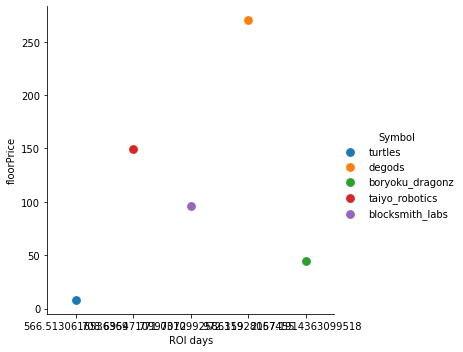

In [95]:
splot = sns.catplot(x='ROI days',
                    y='floorPrice',
                    hue='Symbol',
                    data=dfTABLE.round(),
                    kind='point',
                    fit_reg=False,
                    aspect=1)

splot
#splot.set(xscale="log")

In [96]:
import os   

if not os.path.isfile(r'C:\Users\kkanoee\Documents\Python Scripts\SOLTOKENS.xlsx'):
    dfA.to_excel(r'C:\Users\kkanoee\Documents\Python Scripts\SOLTOKENS.xlsx', header='column_names')
else: dfA.to_excel(r'C:\Users\kkanoee\Documents\Python Scripts\SOLTOKENS.xslx', mode='a', header=False)